In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Gasoline RBOB

## 7:3

In [2]:
# Đọc dữ liệu
data = pd.read_csv('Gasoline RBOB Futures Historical Data.csv').dropna()

In [3]:
# Tiền xử lý dữ liệu
# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])
# Sắp xếp dữ liệu theo ngày
data.sort_values(by='Date', inplace=True)
# Đảo ngược dữ liệu để dự đoán giá trị trong tương lai
data = data.iloc[::-1].reset_index(drop=True)

In [4]:
# Chuyển đổi cột 'Vol.' thành số
# Chuyển đổi cột 'Change %' thành số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

data['Vol.'] = data['Vol.'] .apply(convert_volume_to_number)
data['Change %'] = data['Change %'].apply(convert_change_to_number)

In [5]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = data.reset_index()['Price']
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

0       2.6847
1       2.7006
2       2.7484
3       2.7398
4       2.7271
         ...  
1325    1.4740
1326    1.4505
1327    1.4515
1328    1.4377
1329    1.4150
Name: Price, Length: 1330, dtype: float64

In [6]:
# Chọn các đặc trưng để huấn luyện mô hình
features = ['High']
X = data[features].copy()
# Chọn cột 'Price' làm biến mục tiêu
y = data['Price']

In [7]:
# Số lượng mẫu cho tập huấn luyện (70%)
train_size = int(len(X) * 0.7)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [8]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
predictions = model.predict(X_test)
predictions

array([1.236812  , 1.259721  , 1.265971  , 1.260247  , 1.268994  ,
       1.26784   , 1.27638   , 1.257233  , 1.276357  , 1.270671  ,
       1.243027  , 1.251501  , 1.2295705 , 1.272329  , 1.216825  ,
       1.276637  , 1.276637  , 1.281215  , 1.281215  , 1.281192  ,
       1.272816  , 1.178049  , 1.2461835 , 1.233757  , 1.280736  ,
       1.235079  , 1.239448  , 1.157987  , 1.274507  , 1.281215  ,
       1.231266  , 1.181467  , 1.236147  , 1.236239  , 1.229977  ,
       1.156891  , 1.274509  , 1.236147  , 1.23466   , 1.26967   ,
       1.234756  , 1.210458  , 1.164571  , 1.169929  , 1.181482  ,
       1.181482  , 1.181482  , 1.181482  , 1.181482  , 1.181482  ,
       1.236197  , 1.181482  , 1.243446  , 1.211659  , 1.181482  ,
       1.211078  , 1.181482  , 1.181482  , 1.181482  , 1.181482  ,
       1.181482  , 1.181482  , 1.181482  , 1.181482  , 1.181482  ,
       1.181482  , 1.181482  , 1.181482  , 1.181482  , 1.181482  ,
       1.181482  , 1.181482  , 1.181482  , 1.211078  , 1.18148

In [10]:
# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


MAE: 0.14650455079365063
Root Mean Squared Error: 0.17523066844491067
Mean Absolute Percentage Error (MAPE): 11.16135969775727


In [11]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.295994   1.300274   1.304248   1.304156   1.31005    1.304533
 1.304156   1.324166   1.28724    1.29576    1.29576    1.26243
 1.269672   1.31799    1.28437886 1.295794   1.30915    1.299827
 1.354472   1.365786   1.306169   1.363125   1.277517   1.278592
 1.347447   1.25537    1.34273286 1.34361486 1.235863   1.24929   ]


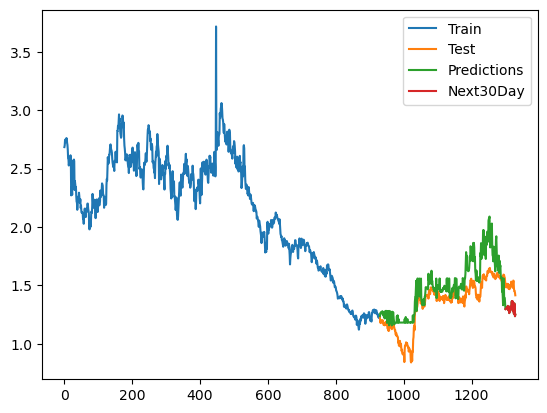

In [13]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()


## 8:2

In [14]:
# Đọc dữ liệu
data = pd.read_csv('Gasoline RBOB Futures Historical Data.csv').dropna()

In [15]:
# Tiền xử lý dữ liệu
# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])
# Sắp xếp dữ liệu theo ngày
data.sort_values(by='Date', inplace=True)
# Đảo ngược dữ liệu để dự đoán giá trị trong tương lai
data = data.iloc[::-1].reset_index(drop=True)

In [16]:
# Chuyển đổi cột 'Vol.' thành số
# Chuyển đổi cột 'Change %' thành số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

data['Vol.'] = data['Vol.'] .apply(convert_volume_to_number)
data['Change %'] = data['Change %'].apply(convert_change_to_number)

In [17]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = data.reset_index()['Price']
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

0       2.6847
1       2.7006
2       2.7484
3       2.7398
4       2.7271
         ...  
1325    1.4740
1326    1.4505
1327    1.4515
1328    1.4377
1329    1.4150
Name: Price, Length: 1330, dtype: float64

In [18]:
# Chọn các đặc trưng để huấn luyện mô hình
features = ['High']
X = data[features].copy()
# Chọn cột 'Price' làm biến mục tiêu
y = data['Price']

In [19]:
# Số lượng mẫu cho tập huấn luyện (80%)
train_size = int(len(X) * 0.8)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [20]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
predictions = model.predict(X_test)
predictions

array([1.398999  , 1.480547  , 1.476763  , 1.477999  , 1.477999  ,
       1.423327  , 1.476763  , 1.431573  , 1.476763  , 1.597305  ,
       1.545137  , 1.597949  , 1.552174  , 1.509554  , 1.564601  ,
       1.568678  , 1.572074  , 1.550626  , 1.612487  , 1.509554  ,
       1.546605  , 1.509554  , 1.432248  , 1.423327  , 1.446483  ,
       1.446483  , 1.453137  , 1.427391  , 1.476763  , 1.477999  ,
       1.476763  , 1.435666  , 1.383542  , 1.38865175, 1.400947  ,
       1.497775  , 1.487879  , 1.492707  , 1.419189  , 1.497775  ,
       1.492707  , 1.476763  , 1.568809  , 1.426809  , 1.453731  ,
       1.426809  , 1.426809  , 1.400947  , 1.426809  , 1.398209  ,
       1.426809  , 1.425549  , 1.42299   , 1.425549  , 1.477999  ,
       1.476763  , 1.492707  , 1.484666  , 1.432248  , 1.446483  ,
       1.480547  , 1.453731  , 1.398999  , 1.383542  , 1.400947  ,
       1.440587  , 1.400947  , 1.427367  , 1.426809  , 1.426809  ,
       1.553994  , 1.379318  , 1.374178  , 1.3872305 , 1.38495

In [22]:
# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


MAE: 0.14765480675145629
Root Mean Squared Error: 0.182105178919097
Mean Absolute Percentage Error (MAPE): 9.838066424431087


In [23]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.29714    1.301848   1.306745   1.306653   1.311374   1.304065
 1.306653   1.326987   1.286295   1.290407   1.290407   1.260577
 1.266363   1.315562   1.27858219 1.290407   1.311074   1.301401
 1.358876   1.360829   1.308121   1.360006   1.276479   1.277835
 1.35095    1.210303   1.33200534 1.33200534 1.215592   1.243886  ]


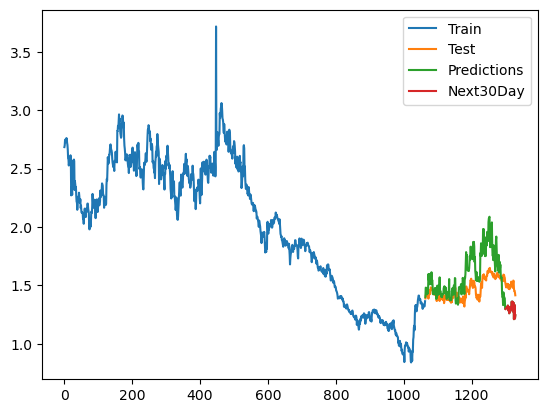

In [24]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

## 9:1

In [25]:
# Số lượng mẫu cho tập huấn luyện (90%)
train_size = int(len(X) * 0.9)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [26]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
predictions = model.predict(X_test)
predictions

array([1.830018  , 1.83168233, 1.7503551 , 1.812524  , 1.812524  ,
       1.812524  , 1.702918  , 1.812524  , 1.868708  , 1.574513  ,
       1.868708  , 1.8309434 , 1.565674  , 1.7449135 , 1.465976  ,
       1.425948  , 1.455598  , 1.45545   , 1.585919  , 1.437712  ,
       1.397695  , 1.426324  , 1.505782  , 1.477033  , 1.49969   ,
       1.422367  , 1.412742  , 1.49969   , 1.563152  , 1.76988675,
       1.574513  , 1.772128  , 1.74997675, 1.574513  , 1.766761  ,
       1.838184  , 1.778196  , 1.980397  , 1.88612825, 1.980397  ,
       1.784276  , 1.766761  , 1.827085  , 1.749917  , 1.86392   ,
       1.74997675, 1.915002  , 1.891779  , 1.841661  , 1.956181  ,
       1.95074   , 1.931541  , 1.880066  , 2.042827  , 2.071006  ,
       2.081706  , 2.088205  , 1.926246  , 1.827131  , 1.982048  ,
       1.82941233, 2.02013036, 1.860237  , 2.039623  , 1.839605  ,
       1.75578175, 1.759408  , 1.5929135 , 1.765759  , 1.574513  ,
       1.704444  , 1.65662   , 1.651543  , 1.6080246 , 1.57461

In [28]:
# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

MAE: 0.19280444483123393
Root Mean Squared Error: 0.2225603536067754
Mean Absolute Percentage Error (MAPE): 12.49592935031259


In [29]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.29714    1.301848   1.306745   1.306653   1.311374   1.304065
 1.306653   1.326987   1.286295   1.290407   1.290407   1.260577
 1.266363   1.315562   1.27858219 1.290407   1.311074   1.301401
 1.358876   1.359408   1.3067     1.358585   1.276479   1.277835
 1.351314   1.210303   1.33200534 1.33200534 1.215592   1.243886  ]


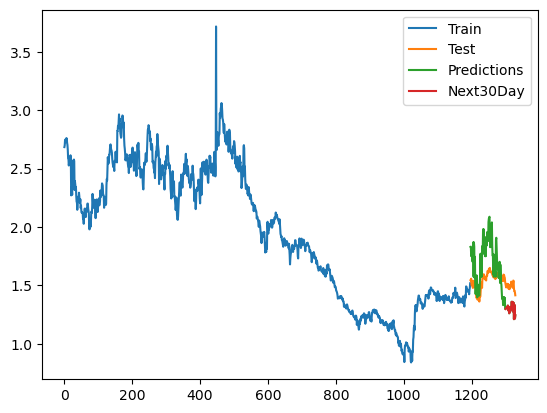

In [30]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()